In [1]:
# Import Packages
import os
from glob import glob
import matplotlib.pyplot as plt
import requests
# import descartes
import urllib
import pandas as pd
from pandas.io.json import json_normalize
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import rasterstats as rs
from shapely.geometry import Point
import earthpy as et
import earthpy.plot as ep
%run ./data_grabber.ipynb


In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME,'earth-analytics'))

# Get data
CPER_tif_files=open_ecosystem_structure('CPER','2017-05')
CPER_insitu_df=open_woody_veg_structure('CPER','2017-09')
ONAQ_tif_files=open_ecosystem_structure('ONAQ','2017-06')
ONAQ_insitu_df=open_woody_veg_structure('ONAQ','2017-09')

In [3]:
# Create shapefile of buffered insitu sites
CPER_insitu_gdf=gpd.GeoDataFrame(CPER_insitu_df,geometry=gpd.points_from_xy(
    x=CPER_insitu_df.easting,y=CPER_insitu_df.northing),crs='epsg:32613')
CPER_buffered_points=CPER_insitu_gdf.copy()
CPER_buffered_points=CPER_insitu_gdf.geometry.buffer(100)
CPER_buffered_points_path=os.path.join(
    'data','NEON','CPER','outputs')
ONAQ_insitu_gdf=gpd.GeoDataFrame(ONAQ_insitu_df,geometry=gpd.points_from_xy(
    x=ONAQ_insitu_df.easting,y=ONAQ_insitu_df.northing),crs='epsg:32613')
ONAQ_buffered_points=ONAQ_insitu_gdf.copy()
ONAQ_buffered_points=ONAQ_insitu_gdf.geometry.buffer(100)
ONAQ_buffered_points_path=os.path.join(
    'data','NEON','ONAQ','outputs')
# ONAQ_buffered_points.to_file(os.path.join(
#      buffered_points_path, 'ONAQ_buffered_points.shp'))

In [11]:
 with rio.open(CPER_tif_files[184]) as src:
        CHM_arr=src.read(1,masked=True)
        extent=src.bounds
        CHM_meta=src.profile
        extent=plotting_extent(src)

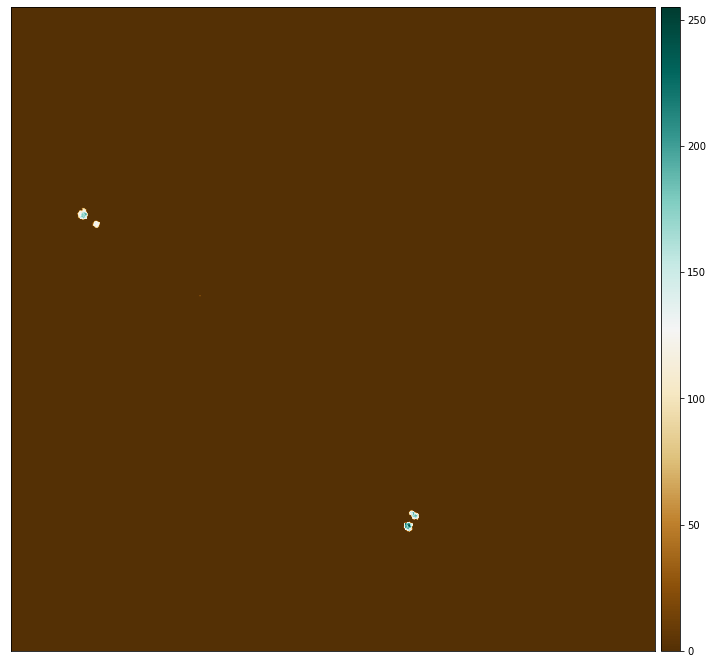

In [12]:
# buffered_points_import=gpd.read_file(buffered_points_shp)
# 0 overlaps slightly
# fig, ax = plt.subplots()
ep.plot_bands(CHM_arr,cmap='BrBG')
#          extent=extent)
# CPER_buffered_points.plot(ax=ax,
#                             color='yellow')


# arr.max()


In [ ]:
x=0
for tif_file in tif_files:
    with rio.open(i) as src:
        CHM_arr=src.read(1,masked=True)
        extent=src.bounds
        CHM_meta=src.profile
    CPER_tree_heights = rs.zonal_stats(buffered_points_shp,
                                       CHM_arr,
                                       nodata=-999,
                                       affine=CHM_meta['transform'],
                                       geojson_out=True,
                                       copy_properties=True,
                                       stats=['count', 'min', 'mean','max','median'])
    for i in CPER_tree_heights:
        if not i['properties']['max'] == None:
            x+=1
            print(i['properties']['max'],x)